<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**Run the code below to download the dataset using Keras.**

In [63]:
from tensorflow.keras.datasets import fashion_mnist

(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

## Visualizing the Data

**Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
xtrain.shape

(60000, 28, 28, 1)

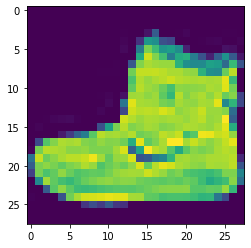

In [49]:
plt.imshow(xtrain[0])

## Preprocessing the Data

**Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [50]:
xtrain.max()

255

In [64]:
xtrain = xtrain/255

In [65]:
xtest = xtest/255

**Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [66]:
xtrain = xtrain.reshape(len(xtrain),28,28,1)

In [67]:
xtest = xtest.reshape(len(xtest),28,28,1)

In [45]:
len(xtest)

10000

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [69]:
from keras.utils import to_categorical

In [70]:
y_cat_train = to_categorical(ytrain)

In [71]:
y_cat_test = to_categorical(ytest)

## Building the Model


In [59]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.callbacks import EarlyStopping

In [97]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='sigmoid'))


model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [98]:
estop = EarlyStopping(monitor='val_loss',mode='min',patience=1)

model.fit(xtrain,y_cat_train,epochs=10,validation_data = (xtest,y_cat_test),callbacks=[estop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 616us/step - loss: 0.4790 - accuracy: 0.8312 - val_loss: 0.3495 - val_accuracy: 0.8765
Epoch 2/10
60000/60000 [==============================] - 35s 590us/step - loss: 0.3131 - accuracy: 0.8900 - val_loss: 0.3059 - val_accuracy: 0.8924
Epoch 3/10
60000/60000 [==============================] - 36s 594us/step - loss: 0.2766 - accuracy: 0.9021 - val_loss: 0.2947 - val_accuracy: 0.8978
Epoch 4/10
60000/60000 [==============================] - 35s 587us/step - loss: 0.2603 - accuracy: 0.9088 - val_loss: 0.2871 - val_accuracy: 0.8998
Epoch 5/10
60000/60000 [==============================] - 36s 607us/step - loss: 0.2504 - accuracy: 0.9121 - val_loss: 0.2889 - val_accuracy: 0.9002


### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [99]:
model.metrics_names

['loss', 'accuracy']

In [100]:
model.evaluate(xtest,y_cat_test)

10000/10000 [==============================] - 2s 169us/step


[0.28893461134433746, 0.9002000093460083]

In [80]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(ytest,model.predict_classes(xtest)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.85      0.85      1000
           3       0.87      0.95      0.91      1000
           4       0.80      0.88      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.78      0.61      0.68      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.96      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



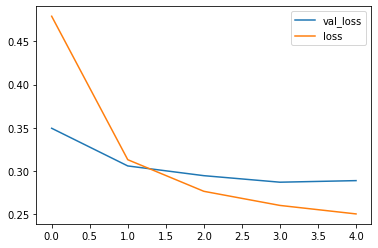

In [103]:
eva = pd.DataFrame(model.history.history)
eva[['val_loss','loss']].plot()

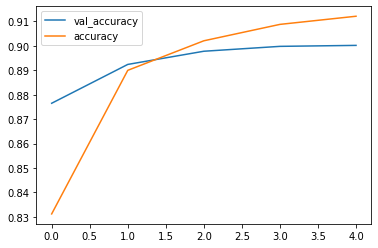

In [106]:
eva[['val_accuracy','accuracy']].plot()

# Great Job!